VAR Multivariate Time Series Modeling

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from functools import reduce
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
%matplotlib inline

# Data Selection

In [2]:

df = pd.read_excel(r'C:\Users\rathe\Thesis Code\Data\Ratios_and_Rates_1.xlsx',parse_dates=['Date'], index_col='Date')
print(df.head)


<bound method NDFrame.head of             Cash Reserve Ratio  Statutory Liquidity Ratio Cash0Deposit Ratio  \
Date                                                                           
2011-04-01                 6.0                       24.0                  0   
2011-04-08                 6.0                       24.0                  0   
2011-04-15                 6.0                       24.0                  0   
2011-04-22                 6.0                       24.0                  0   
2011-04-29                 6.0                       24.0                  0   
...                        ...                        ...                ...   
2021-05-28                 4.0                       18.0                  0   
2021-06-04                 4.0                       18.0               4.92   
2021-06-11                 4.0                       18.0                  0   
2021-06-18                 4.0                       18.0               4.96   
2021-06-25

In [3]:
df.drop(df.columns[[2,3,4,5,6,11,12,13,23]],axis=1,inplace=True)

In [4]:
df

Cash Reserve Ratio  Statutory Liquidity Ratio  Policy Repo Rate  \
Date                                                                          
2011-04-01                 6.0                       24.0              6.75   
2011-04-08                 6.0                       24.0              6.75   
2011-04-15                 6.0                       24.0              6.75   
2011-04-22                 6.0                       24.0              6.75   
2011-04-29                 6.0                       24.0              6.75   
...                        ...                        ...               ...   
2021-05-28                 4.0                       18.0              4.00   
2021-06-04                 4.0                       18.0              4.00   
2021-06-11                 4.0                       18.0              4.00   
2021-06-18                 4.0                       18.0              4.00   
2021-06-25                 4.0                       18.0              4.00   

            Reverse Repo Rate  Marginal Standing Facility (MSF) Rate  \
Date                                                                   
2011-04-01               5.75                                   0.00   
2011-04-08               5.75                                   0.00   
2011-04-15               5.75                                   0.00   
2011-04-22               5.75                                   0.00   
2011-04-29               5.75                                   0.00   
...                       ...                                    ...   
2021-05-28               3.35                                   4.25   
2021-06-04               3.35                                   4.25   
2021-06-11               3.35                                   4.25   
2021-06-18               3.35                                   4.25   
2021-06-25               3.35                                   4.25   

            Bank Rate  Call Money Rate (Weighted Average)  \
Date                                                        
2011-04-01       6.00                                7.60   
2011-04-08       6.00                                6.22   
2011-04-15       6.00                                6.77   
2011-04-22       6.00                                6.40   
2011-04-29       6.00                                6.87   
...               ...                                 ...   
2021-05-28       4.25                                3.18   
2021-06-04       4.25                                3.13   
2021-06-11       4.25                                3.11   
2021-06-18       4.25                                3.16   
2021-06-25       4.25                                3.15   

            910Day Treasury Bill (Primary) Yield  \
Date                                               
2011-04-01                                  0.00   
2011-04-08                                  0.00   
2011-04-15                                  0.00   
2011-04-22                                  0.00   
2011-04-29                                  0.00   
...                                          ...   
2021-05-28                                  3.40   
2021-06-04                                  3.41   
2021-06-11                                  3.40   
2021-06-18                                  3.47   
2021-06-25                                  3.47   

            1820Day Treasury Bill (Primary) Yield  \
Date                                                
2011-04-01                                   0.00   
2011-04-08                                   0.00   
2011-04-15                                   0.00   
2011-04-22                                   0.00   
2011-04-29                                   0.00   
...                                           ...   
2021-05-28                                   3.60   
2021-06-04                                   3.65   
2021-06-11                                   3

In [5]:
df.isnull().values.any()

False

# Exploratory Data Analysis 

In [6]:
print(df.shape)  
df.tail()

(535, 16)


Cash Reserve Ratio  Statutory Liquidity Ratio  Policy Repo Rate  \
Date                                                                          
2021-05-28                 4.0                       18.0               4.0   
2021-06-04                 4.0                       18.0               4.0   
2021-06-11                 4.0                       18.0               4.0   
2021-06-18                 4.0                       18.0               4.0   
2021-06-25                 4.0                       18.0               4.0   

            Reverse Repo Rate  Marginal Standing Facility (MSF) Rate  \
Date                                                                   
2021-05-28               3.35                                   4.25   
2021-06-04               3.35                                   4.25   
2021-06-11               3.35                                   4.25   
2021-06-18               3.35                                   4.25   
2021-06-25               3.35                                   4.25   

            Bank Rate  Call Money Rate (Weighted Average)  \
Date                                                        
2021-05-28       4.25                                3.18   
2021-06-04       4.25                                3.13   
2021-06-11       4.25                                3.11   
2021-06-18       4.25                                3.16   
2021-06-25       4.25                                3.15   

            910Day Treasury Bill (Primary) Yield  \
Date                                               
2021-05-28                                  3.40   
2021-06-04                                  3.41   
2021-06-11                                  3.40   
2021-06-18                                  3.47   
2021-06-25                                  3.47   

            1820Day Treasury Bill (Primary) Yield  \
Date                                                
2021-05-28                                   3.60   
2021-06-04                                   3.65   
2021-06-11                                   3.64   
2021-06-18                                   3.70   
2021-06-25                                   3.72   

            3640Day Treasury Bill (Primary) Yield  \
Date                                                
2021-05-28                                   3.73   
2021-06-04                                   3.74   
2021-06-11                                   3.76   
2021-06-18                                   3.85   
2021-06-25                                   3.89   

            INR0US$ Spot Rate ( Rs. Per Foreign Currency)  \
Date                                                        
2021-05-28                                          72.48   
2021-06-04                                          73.03   
2021-06-11                                          72.98   
2021-06-18                                          74.14   
2021-06-25                                          74.18   

            INR0Euro Spot Rate ( Rs. Per Foreign Currency)  \
Date                                                         
2021-05-28                                           88.23   
2021-06-04                                           88.45   
2021-06-11                                           88.98   
2021-06-18                                           88.26   
2021-06-25                                           88.57   

            Forward Premia of US$ 10month  Forward Premia of US$ 30month  \
Date                                                                       
2021-05-28                           5.46                           5.63   
2021-06-04                           3.62                           4.08   
2021-06-11                           4.19                           4.30   
2021-06-18                           3.97                           4.15   
2021-06-25                           3.80                           3.99   

            Forward 

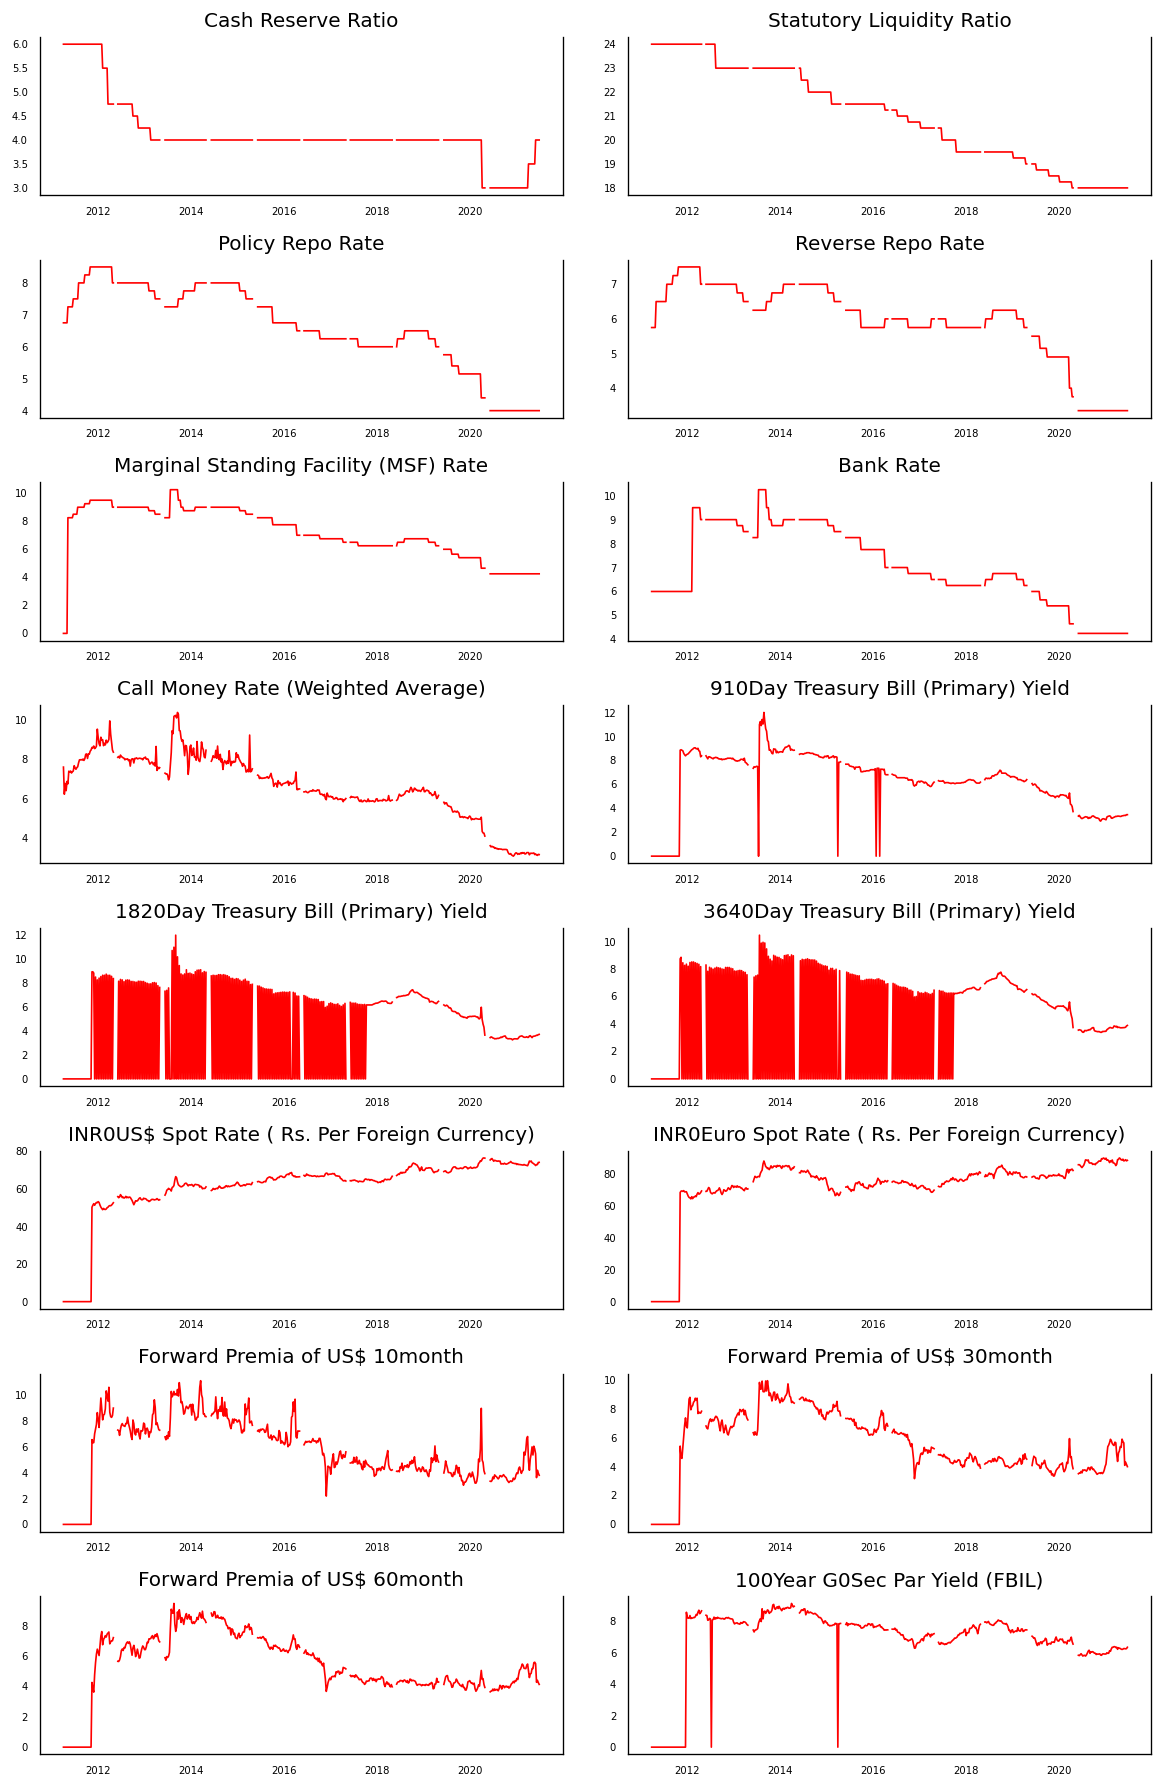

In [7]:
fig, axes = plt.subplots(nrows=8, ncols=2, dpi=120, figsize=(10,15))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Granulerity Test

In [8]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)        

C:\Users\rathe\Anaconda3\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\rathe\Anaconda3\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 1
  warnings.warn('covariance of constraints does not have full '


Cash Reserve Ratio_x  \
Cash Reserve Ratio_y                                            1.0000   
Statutory Liquidity Ratio_y                                     0.2362   
Policy Repo Rate_y                                              0.0002   
Reverse Repo Rate_y                                             0.0001   
Marginal Standing Facility (MSF) Rate_y                         0.0000   
Bank Rate_y                                                     0.0000   
Call Money Rate (Weighted Average)_y                            0.0021   
910Day Treasury Bill (Primary) Yield_y                          0.2117   
1820Day Treasury Bill (Primary) Yield_y                         0.0000   
3640Day Treasury Bill (Primary) Yield_y                         0.0000   
INR0US$ Spot Rate ( Rs. Per Foreign Currency)_y                 0.5111   
INR0Euro Spot Rate ( Rs. Per Foreign Currency)_y                0.3329   
Forward Premia of US$ 10month_y                                 0.0029   
Forward Premia of US$ 30month_y                                 0.0001   
Forward Premia of US$ 60month_y                                 0.0007   
100Year G0Sec Par Yield (FBIL)_y                                0.0825   

                                                  Statutory Liquidity Ratio_x  \
Cash Reserve Ratio_y                                                   0.6482   
Statutory Liquidity Ratio_y                                            1.0000   
Policy Repo Rate_y                                                     0.0000   
Reverse Repo Rate_y                                                    0.0003   
Marginal Standing Facility (MSF) Rate_y                                0.0000   
Bank Rate_y                                                            0.0010   
Call Money Rate (Weighted Average)_y                                   0.0000   
910Day Treasury Bill (Primary) Yield_y                                 0.0078   
1820Day Treasury Bill (Primary) Yield_y                                0.0000   
3640Day Treasury Bill (Primary) Yield_y                                0.0000   
INR0US$ Spot Rate ( Rs. Per Foreign Currency)_y                        0.2434   
INR0Euro Spot Rate ( Rs. Per Foreign Currency)_y                       0.4704   
Forward Premia of US$ 10month_y                                        0.0109   
Forward Premia of US$ 30month_y                                        0.0091   
Forward Premia of US$ 60month_y                                        0.0098   
100Year G0Sec Par Yield (FBIL)_y                                       0.0537   

                                                  Policy Repo Rate_x  \
Cash Reserve Ratio_y                                          0.0000   
Statutory Liquidity Ratio_y                                   0.6375   
Policy Repo Rate_y                                            1.0000   
Reverse Repo Rate_y                                           0.0683   
Marginal Standing Facility (MSF) Rate_y                       0.0000   
Bank Rate_y                                                   0.0003   
Call Money Rate (Weighted Average)_y                          0.0000   
910Day Treasury Bill (Primary) Yield_y                        0.0000   
1820Day Treasury Bill (Primary) Yield_y                       0.0215   
3640Day Treasury Bill (Primary) Yield_y                       0.0008   
INR0US$ Spot Rate ( Rs. Per Foreign Currency)_y               0.0951   
INR0Euro Spot Rate ( Rs. Per Foreign Currency)_y              0.1212   
Forward Premia of US$ 10month_y                               0.0008   
Forward Premia of US$ 30month_y                               0.0033   
Forward Premia of US$ 60month_y                               0.0044   
100Year G0Sec Par Yield (FBIL)_y                              0.3108   

                                                  Reverse Repo Rate_x  \
Cash Reserve Ratio_y                                           0.0000   
Statutory Liquidity Ratio_y               

# Cointegration Test

In [9]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Cash Reserve Ratio ::  1314.28   > nan       =>   False
Statutory Liquidity Ratio ::  1028.26   > nan       =>   False
Policy Repo Rate ::  771.05    > nan       =>   False
Reverse Repo Rate ::  588.73    > nan       =>   False
Marginal Standing Facility (MSF) Rate ::  423.63    > 311.1288  =>   True
Bank Rate ::  318.11    > 263.2603  =>   True
Call Money Rate (Weighted Average) ::  243.71    > 219.4051  =>   True
910Day Treasury Bill (Primary) Yield ::  183.68    > 179.5199  =>   True
1820Day Treasury Bill (Primary) Yield ::  137.79    > 143.6691  =>   False
3640Day Treasury Bill (Primary) Yield ::  97.23     > 111.7797  =>   False
INR0US$ Spot Rate ( Rs. Per Foreign Currency) ::  68.92     > 83.9383   =>   False
INR0Euro Spot Rate ( Rs. Per Foreign Currency) ::  43.74     > 60.0627   =>   False
Forward Premia of US$ 10month ::  22.72     > 40.1749   =>   False
Forward Premia of US$ 30month ::  8

C:\Users\rathe\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:569: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn("Critical values are only available for time series "


In [10]:
df.drop(df.columns[[8,9,14,15]],axis=1,inplace=True)

In [11]:
df.to_csv(r'C:\Users\rathe\Thesis Code\Data\Ratio_Final.csv')

In [12]:
r1 = pd.read_csv("Data\Ratio_Final.csv",index_col="Date")

In [13]:
r1

Cash Reserve Ratio  Statutory Liquidity Ratio  Policy Repo Rate  \
Date                                                                          
2011-04-01                 6.0                       24.0              6.75   
2011-04-08                 6.0                       24.0              6.75   
2011-04-15                 6.0                       24.0              6.75   
2011-04-22                 6.0                       24.0              6.75   
2011-04-29                 6.0                       24.0              6.75   
...                        ...                        ...               ...   
2021-05-28                 4.0                       18.0              4.00   
2021-06-04                 4.0                       18.0              4.00   
2021-06-11                 4.0                       18.0              4.00   
2021-06-18                 4.0                       18.0              4.00   
2021-06-25                 4.0                       18.0              4.00   

            Reverse Repo Rate  Marginal Standing Facility (MSF) Rate  \
Date                                                                   
2011-04-01               5.75                                   0.00   
2011-04-08               5.75                                   0.00   
2011-04-15               5.75                                   0.00   
2011-04-22               5.75                                   0.00   
2011-04-29               5.75                                   0.00   
...                       ...                                    ...   
2021-05-28               3.35                                   4.25   
2021-06-04               3.35                                   4.25   
2021-06-11               3.35                                   4.25   
2021-06-18               3.35                                   4.25   
2021-06-25               3.35                                   4.25   

            Bank Rate  Call Money Rate (Weighted Average)  \
Date                                                        
2011-04-01       6.00                                7.60   
2011-04-08       6.00                                6.22   
2011-04-15       6.00                                6.77   
2011-04-22       6.00                                6.40   
2011-04-29       6.00                                6.87   
...               ...                                 ...   
2021-05-28       4.25                                3.18   
2021-06-04       4.25                                3.13   
2021-06-11       4.25                                3.11   
2021-06-18       4.25                                3.16   
2021-06-25       4.25                                3.15   

            910Day Treasury Bill (Primary) Yield  \
Date                                               
2011-04-01                                  0.00   
2011-04-08                                  0.00   
2011-04-15                                  0.00   
2011-04-22                                  0.00   
2011-04-29                                  0.00   
...                                          ...   
2021-05-28                                  3.40   
2021-06-04                                  3.41   
2021-06-11                                  3.40   
2021-06-18                                  3.47   
2021-06-25                                  3.47   

            INR0US$ Spot Rate ( Rs. Per Foreign Currency)  \
Date                                                        
2011-04-01                                           0.00   
2011-04-08                                           0.00   
2011-04-15                                           0.00   
2011-04-22                                           0.00   
2011-04-29                                           0.00   
...                                                   ...   
2021-05-28                                          72.48   
2021-06-04                 

In [14]:
df = r1
df

Cash Reserve Ratio  Statutory Liquidity Ratio  Policy Repo Rate  \
Date                                                                          
2011-04-01                 6.0                       24.0              6.75   
2011-04-08                 6.0                       24.0              6.75   
2011-04-15                 6.0                       24.0              6.75   
2011-04-22                 6.0                       24.0              6.75   
2011-04-29                 6.0                       24.0              6.75   
...                        ...                        ...               ...   
2021-05-28                 4.0                       18.0              4.00   
2021-06-04                 4.0                       18.0              4.00   
2021-06-11                 4.0                       18.0              4.00   
2021-06-18                 4.0                       18.0              4.00   
2021-06-25                 4.0                       18.0              4.00   

            Reverse Repo Rate  Marginal Standing Facility (MSF) Rate  \
Date                                                                   
2011-04-01               5.75                                   0.00   
2011-04-08               5.75                                   0.00   
2011-04-15               5.75                                   0.00   
2011-04-22               5.75                                   0.00   
2011-04-29               5.75                                   0.00   
...                       ...                                    ...   
2021-05-28               3.35                                   4.25   
2021-06-04               3.35                                   4.25   
2021-06-11               3.35                                   4.25   
2021-06-18               3.35                                   4.25   
2021-06-25               3.35                                   4.25   

            Bank Rate  Call Money Rate (Weighted Average)  \
Date                                                        
2011-04-01       6.00                                7.60   
2011-04-08       6.00                                6.22   
2011-04-15       6.00                                6.77   
2011-04-22       6.00                                6.40   
2011-04-29       6.00                                6.87   
...               ...                                 ...   
2021-05-28       4.25                                3.18   
2021-06-04       4.25                                3.13   
2021-06-11       4.25                                3.11   
2021-06-18       4.25                                3.16   
2021-06-25       4.25                                3.15   

            910Day Treasury Bill (Primary) Yield  \
Date                                               
2011-04-01                                  0.00   
2011-04-08                                  0.00   
2011-04-15                                  0.00   
2011-04-22                                  0.00   
2011-04-29                                  0.00   
...                                          ...   
2021-05-28                                  3.40   
2021-06-04                                  3.41   
2021-06-11                                  3.40   
2021-06-18                                  3.47   
2021-06-25                                  3.47   

            INR0US$ Spot Rate ( Rs. Per Foreign Currency)  \
Date                                                        
2011-04-01                                           0.00   
2011-04-08                                           0.00   
2011-04-15                                           0.00   
2011-04-22                                           0.00   
2011-04-29                                           0.00   
...                                                   ...   
2021-05-28                                          72.48   
2021-06-04                 

# Splitting Train Test

In [15]:
nobs = 30
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape)  

(505, 12)
(30, 12)


# Stationary Test

In [16]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [17]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Cash Reserve Ratio" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2834
 No. Lags Chosen       = 6
 Critical value 1%     = -3.444
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.1774. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Statutory Liquidity Ratio" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.0489
 No. Lags Chosen       = 0
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.9543. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Policy Repo Rate" 
    -------------------------------------

In [18]:
df_differenced = df_train.diff().dropna()

In [19]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Cash Reserve Ratio" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.4704
 No. Lags Chosen       = 5
 Critical value 1%     = -3.444
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Statutory Liquidity Ratio" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -22.9619
 No. Lags Chosen       = 0
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Policy Repo Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. 

In [20]:
df_differenced = df_differenced.diff().dropna()

In [21]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Cash Reserve Ratio" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.9048
 No. Lags Chosen       = 12
 Critical value 1%     = -3.444
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Statutory Liquidity Ratio" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.8644
 No. Lags Chosen       = 14
 Critical value 1%     = -3.444
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Policy Repo Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root

# Checking for best lag

In [22]:
model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -35.65230589469412
BIC :  -34.345318002195846
FPE :  3.2844293885399906e-16
HQIC:  -35.13962055392855 

Lag Order = 2
AIC :  -35.67442371918303
BIC :  -33.157173120714006
FPE :  3.215302491922786e-16
HQIC:  -34.68691105329511 

Lag Order = 3
AIC :  -35.6354461519481
BIC :  -31.90425401421279
FPE :  3.3505650961445474e-16
HQIC:  -34.17158200771094 

Lag Order = 4
AIC :  -35.783311297557646
BIC :  -30.834480184907143
FPE :  2.902516100987264e-16
HQIC:  -33.84156367450856 

Lag Order = 5
AIC :  -37.42185495748923
BIC :  -31.25166870139914
FPE :  5.67885445979734e-17
HQIC:  -35.00068395261028 

Lag Order = 6
AIC :  -38.45626953398191
BIC :  -31.06099310136001
FPE :  2.040205920439542e-17
HQIC:  -35.554127285885855 

Lag Order = 7
AIC :  -38.66333154207974
BIC :  -30.039210902390693
FPE :  1.6838866731457095e-17
HQIC:  -35.27866217469619 

Lag Order = 8
AIC :  -38.53555004386023
BIC :  -28.67881203505445
FPE :  1.9528096394962446e-17
HQIC:  -34.66678960961658 

Lag Orde

C:\Users\rathe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\rathe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [23]:
x = model.select_order(maxlags=12)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

# Model Training

In [24]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, Aug, 2021
Time:                     21:16:03
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -30.8345
Nobs:                     501.000    HQIC:                  -33.8416
Log likelihood:           1021.06    FPE:                2.90252e-16
AIC:                     -35.7833    Det(Omega_mle):     9.47273e-17
--------------------------------------------------------------------
Results for equation Cash Reserve Ratio
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                    -0.097576         0.155789           -0.626           0.531
L1.Cash Reserve Rati

# Checking Serial Correlation

In [25]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Cash Reserve Ratio : 1.91
Statutory Liquidity Ratio : 2.01
Policy Repo Rate : 2.04
Reverse Repo Rate : 2.04
Marginal Standing Facility (MSF) Rate : 2.4
Bank Rate : 2.01
Call Money Rate (Weighted Average) : 2.02
910Day Treasury Bill (Primary) Yield : 2.01
INR0US$ Spot Rate ( Rs. Per Foreign Currency) : 2.01
INR0Euro Spot Rate ( Rs. Per Foreign Currency) : 2.01
Forward Premia of US$ 10month : 2.02
Forward Premia of US$ 30month : 2.01


# Forecasting

In [26]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_train.values[lag_order:]
forecast_input

4


array([[ 6.  , 24.  ,  6.75, ...,  0.  ,  0.  ,  0.  ],
       [ 6.  , 24.  ,  7.25, ...,  0.  ,  0.  ,  0.  ],
       [ 6.  , 24.  ,  7.25, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 3.  , 18.  ,  4.  , ..., 88.15,  3.37,  3.54],
       [ 3.  , 18.  ,  4.  , ..., 88.15,  3.32,  3.56],
       [ 3.  , 18.  ,  4.  , ..., 88.02,  3.36,  3.52]])

In [27]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

Cash Reserve Ratio_2d  Statutory Liquidity Ratio_2d  \
Date                                                              
2020-12-04               3.000474                     17.996289   
2020-12-11               2.991646                     17.999345   
2020-12-18               2.980006                     18.001669   
2020-12-25               2.973441                     17.999412   
2021-01-01               2.967585                     17.998594   
2021-01-08               2.961754                     17.998760   
2021-01-15               2.956417                     17.999186   
2021-01-22               2.951364                     17.999867   
2021-01-29               2.946507                     18.001106   
2021-02-05               2.942199                     18.002893   
2021-02-12               2.938244                     18.005118   
2021-02-19               2.934615                     18.007816   
2021-02-26               2.931267                     18.010986   
2021-03-05               2.928093                     18.014545   
2021-03-12               2.925043                     18.018458   
2021-03-19               2.922098                     18.022696   
2021-03-26               2.919222                     18.027233   
2021-04-02               2.916408                     18.032042   
2021-04-09               2.913639                     18.037108   
2021-04-16               2.910896                     18.042414   
2021-04-23               2.908160                     18.047946   
2021-04-30               2.905415                     18.053689   
2021-05-07               2.902642                     18.059632   
2021-05-14               2.899826                     18.065761   
2021-05-21               2.896955                     18.072068   
2021-05-28               2.894020                     18.078541   
2021-06-04               2.891015                     18.085174   
2021-06-11               2.887933                     18.091958   
2021-06-18               2.884773                     18.098888   
2021-06-25               2.881535                     18.105958   

            Policy Repo Rate_2d  Reverse Repo Rate_2d  \
Date                                                    
2020-12-04             3.992368              3.338708   
2020-12-11             3.974456              3.320221   
2020-12-18             3.963243              3.308022   
2020-12-25             3.956452              3.298677   
2021-01-01             3.948133              3.286411   
2021-01-08             3.940010              3.274434   
2021-01-15             3.932557              3.263788   
2021-01-22             3.925610              3.253499   
2021-01-29             3.919191              3.243625   
2021-02-05             3.913534              3.234616   
2021-02-12             3.908545              3.226240   
2021-02-19             3.904120              3.218429   
2021-02-26             3.900150              3.211093   
2021-03-05             3.896613              3.204202   
2021-03-12             3.893468              3.197714   
2021-03-19             3.890646              3.191563   
2021-03-26             3.888116              3.185712   
2021-04-02             3.885864              3.180145   
2021-04-09             3.883865              3.174834   
2021-04-16             3.882104              3.169761   
2021-04-23             3.880566              3.164906   
2021-04-30             3.879235              3.160253   
2021-05-07             3.878098              3.155784   
2021-05-14             3.877142              3.151484   
2021-05-21             3.876355              3.147338   
2021-05-28             3.875729              3.143336   
2021-06-04             3.875254              3.139468   
2021-06-11             3.874926              3.135725   
2021-06-18             3.874738              3.132101   
2021-06-25             3.874688              3.128591   

            Marginal Standing Facility (MS

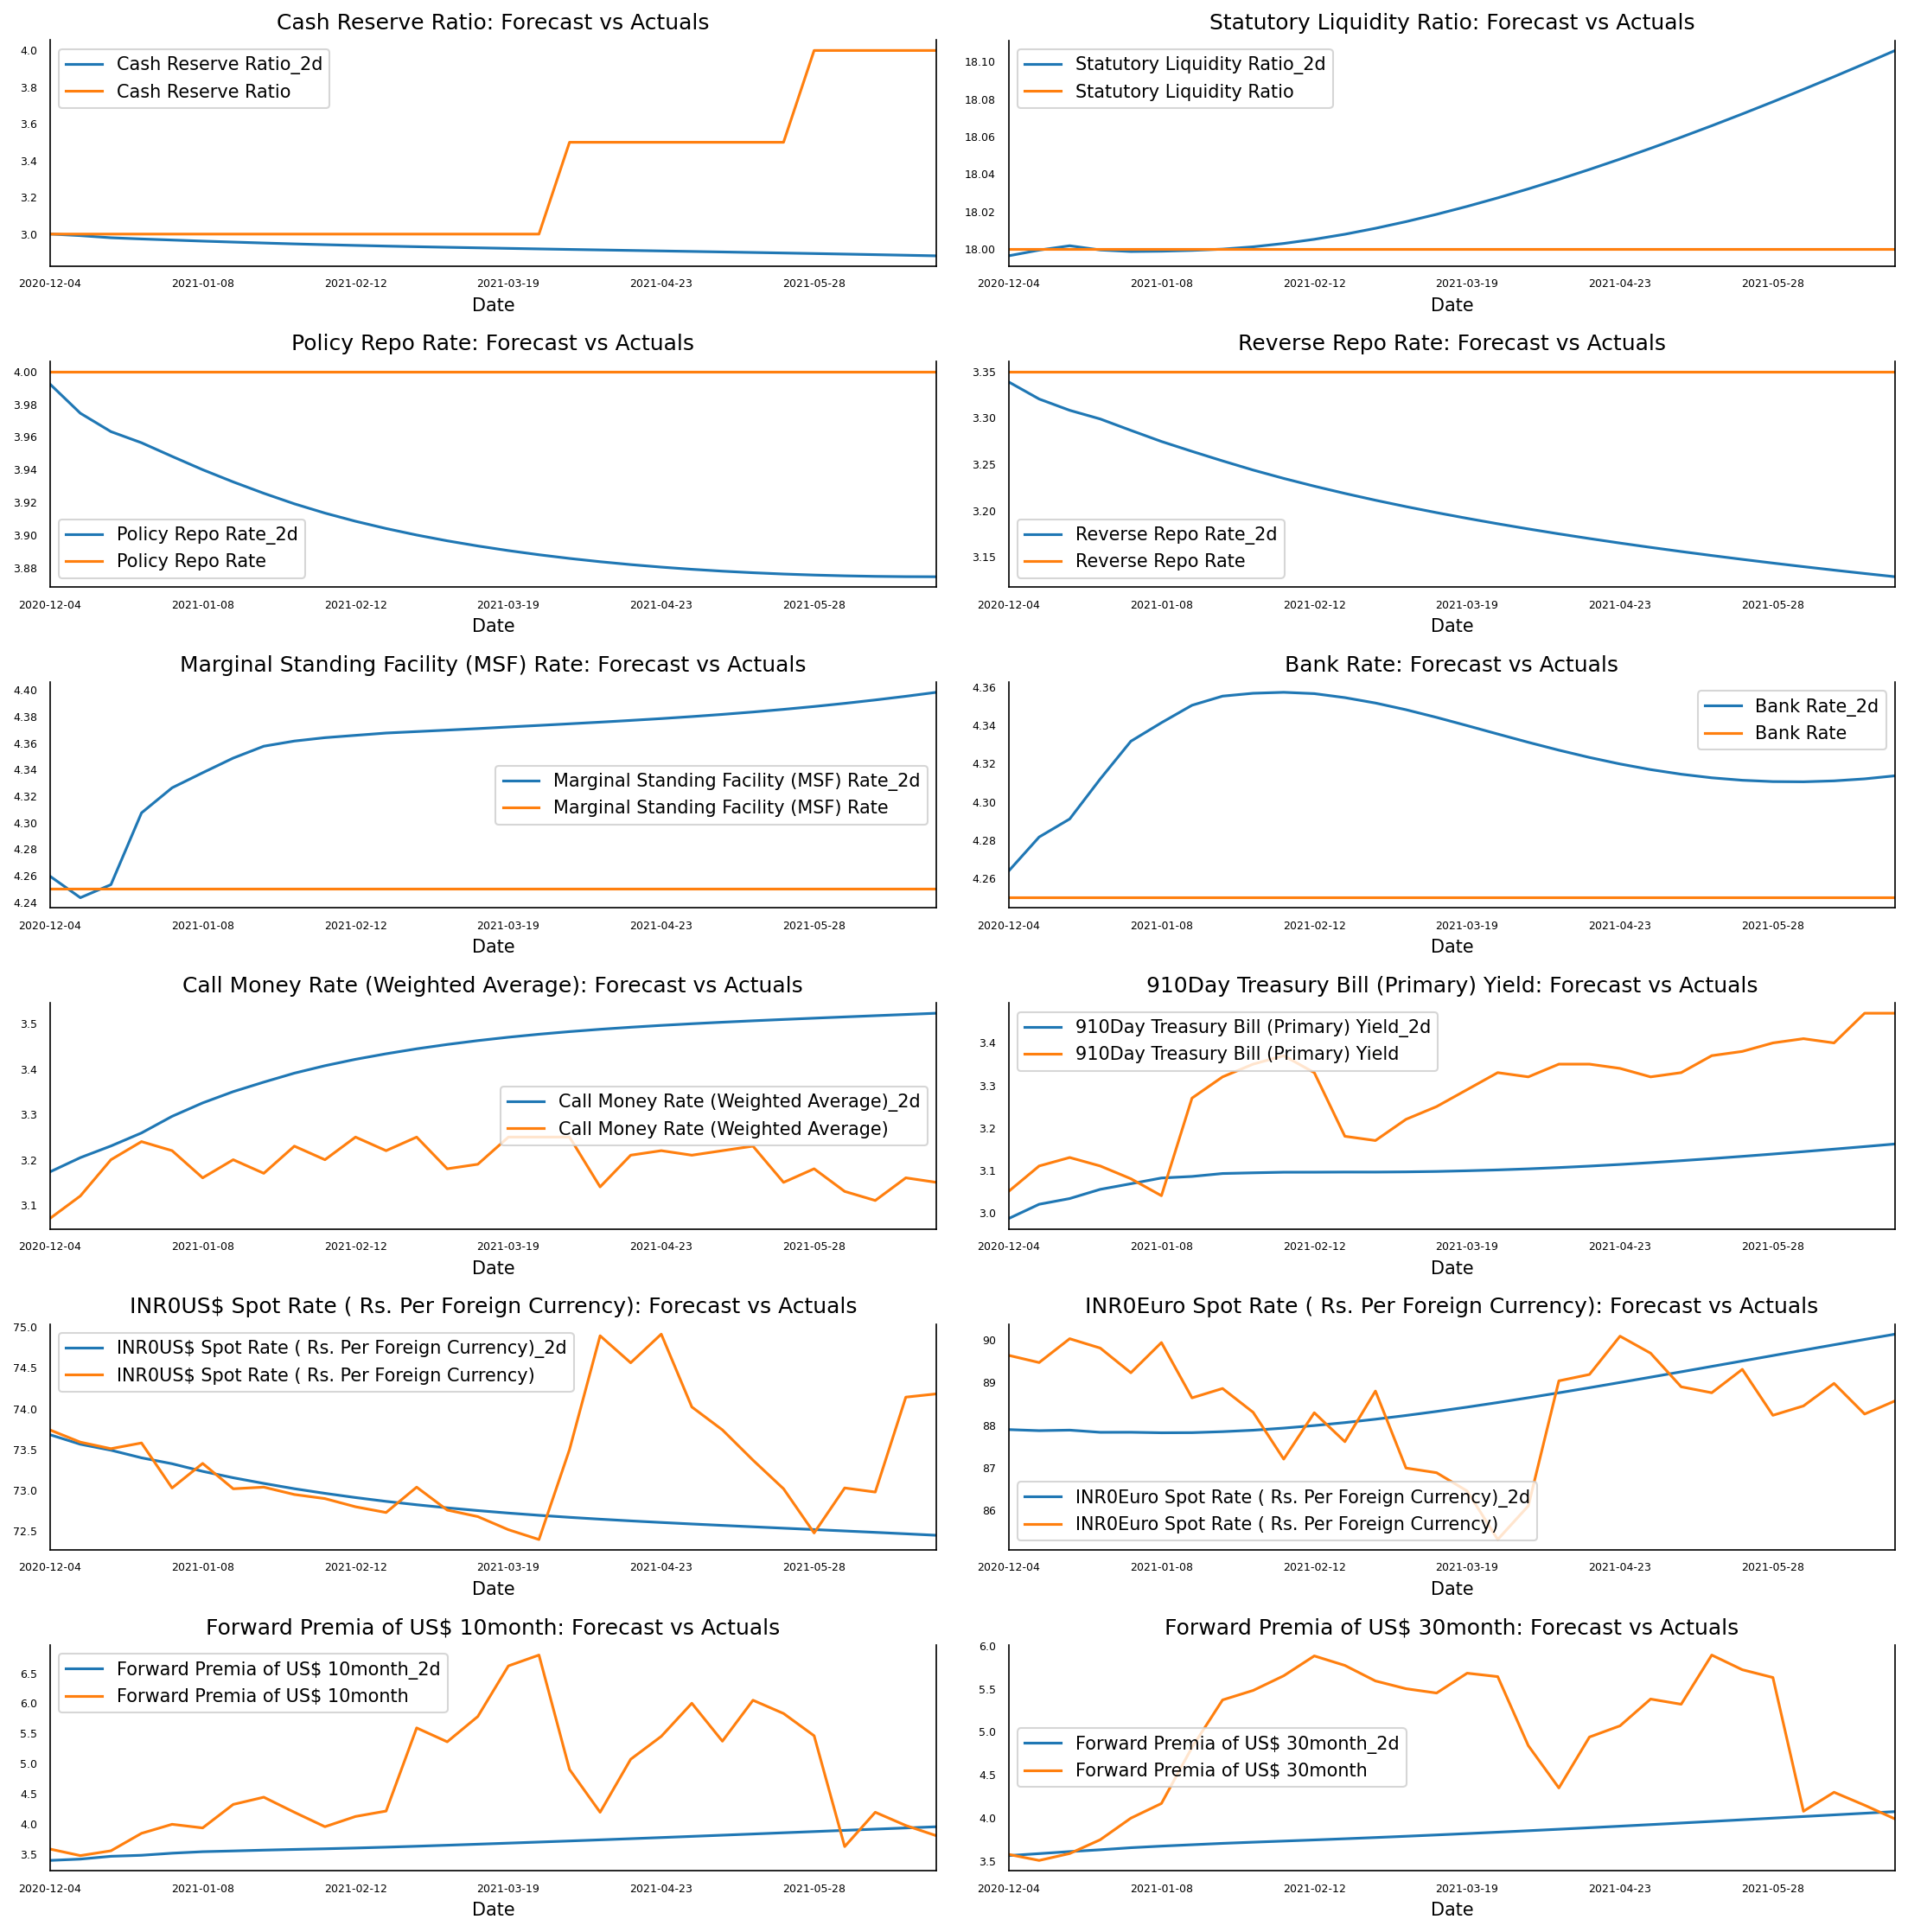

In [28]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(15,15))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_forecast[col+'_2d'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Evaluations

In [29]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [30]:
print('Forecast Accuracy of VAR model: Policy Repo Rate')
accuracy_prod = forecast_accuracy(df_forecast['Policy Repo Rate_2d'].values, df_test['Policy Repo Rate'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of VAR model: Policy Repo Rate
mape :  0.0236
me :  -0.0945
mae :  0.0945
mpe :  -0.0236
rmse :  0.1002
corr :  nan
minmax :  0.0236


C:\Users\rathe\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\rathe\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [31]:
df_forecast[["Policy Repo Rate_2d"]]

Policy Repo Rate_2d
Date                           
2020-12-04             3.992368
2020-12-11             3.974456
2020-12-18             3.963243
2020-12-25             3.956452
2021-01-01             3.948133
2021-01-08             3.940010
2021-01-15             3.932557
2021-01-22             3.925610
2021-01-29             3.919191
2021-02-05             3.913534
2021-02-12             3.908545
2021-02-19             3.904120
2021-02-26             3.900150
2021-03-05             3.896613
2021-03-12             3.893468
2021-03-19             3.890646
2021-03-26             3.888116
2021-04-02             3.885864
2021-04-09             3.883865
2021-04-16             3.882104
2021-04-23             3.880566
2021-04-30             3.879235
2021-05-07             3.878098
2021-05-14             3.877142
2021-05-21             3.876355
2021-05-28             3.875729
2021-06-04             3.875254
2021-06-11             3.874926
2021-06-18             3.874738
2021-06-25             3.874688

In [38]:
mse1 = mean_squared_error(df_forecast['Policy Repo Rate_2d'],df_test['Policy Repo Rate'])
rmse1 = math.sqrt(mse1)
mae1 = mean_absolute_error(df_forecast['Policy Repo Rate_2d'],df_test['Policy Repo Rate'])
MAPE1 = np.mean(np.abs((df_test['Policy Repo Rate'] - df_forecast['Policy Repo Rate_2d']) / df_forecast['Policy Repo Rate_2d'])) * 100
print('The Root Mean Square Error is for VAR model is {:.2f}'.format(rmse1))
print('The Mean Absolute Error is for VAR model is {:.2f}'.format(mae1))
print('The Mean Absolute Percentage Error is for VAR model is {:.2f}%'.format(MAPE1))

The Root Mean Square Error is for VAR model is 0.10
The Mean Absolute Error is for VAR model is 0.09
The Mean Absolute Percentage Error is for VAR model is 2.43%


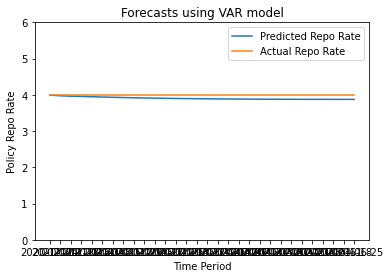

In [33]:
plt.plot(df_forecast['Policy Repo Rate_2d'],label='Predicted Repo Rate')
plt.plot(df_test['Policy Repo Rate'], label='Actual Repo Rate')
plt.ylim([0, 6])
#plt.xlim([0, 50])
plt.title("Forecasts using VAR model")
plt.xlabel("Time Period")
plt.ylabel("Policy Repo Rate")
plt.legend()

In [34]:
df_plot = pd.DataFrame(index=df_forecast.index)

In [35]:
df_plot['Forecasted Repo Rate']=df_forecast['Policy Repo Rate_2d']
df_plot['Actual Repo Rate']=df_test['Policy Repo Rate']
df_plot['Date']=df_forecast.index

In [36]:
import plotly.express as px
fig = px.line(df_plot, x="Date", y=df_plot.columns,
              title='Forecast vs Actual plot using VAR model')
fig.update_layout(yaxis_range=[1,6])
fig.show()